# PCA Assignment on Wine dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PROBLEM STATEMENT - Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


# Objective:- We want to check the performance of data applying on principle component analysis(PCA)

## Dataset - wine

In [3]:
#import libraries
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
import seaborn as sns

## Load the dataset

In [5]:
wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/wine.csv")

In [ ]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
# Checking the no of rows and columns of data set
wine.shape

(178, 14)

## Drop the "Type" column beacuse it coontains 3 types of data point for all data which makes the total dataset into 3 cluster from the beginning

In [7]:
wine1 = wine.drop("Type",axis=1)

In [8]:
#Our new dataset for performing analysis
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
# Checking the no of rows and columns of new data set
wine1.shape

(178, 13)

In [10]:
# Cheking the min/max and spread of the dataset
wine1.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Checking of null values & data types of variable

In [11]:
wine1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


**There is no null value present inside the data and the datatypes of alltributes are appropriate.**

## Checking of duplicate values 

In [12]:
wine1[wine1.duplicated(keep = False)]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


**There is no duplicate value present inside the data**

## Checking of outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

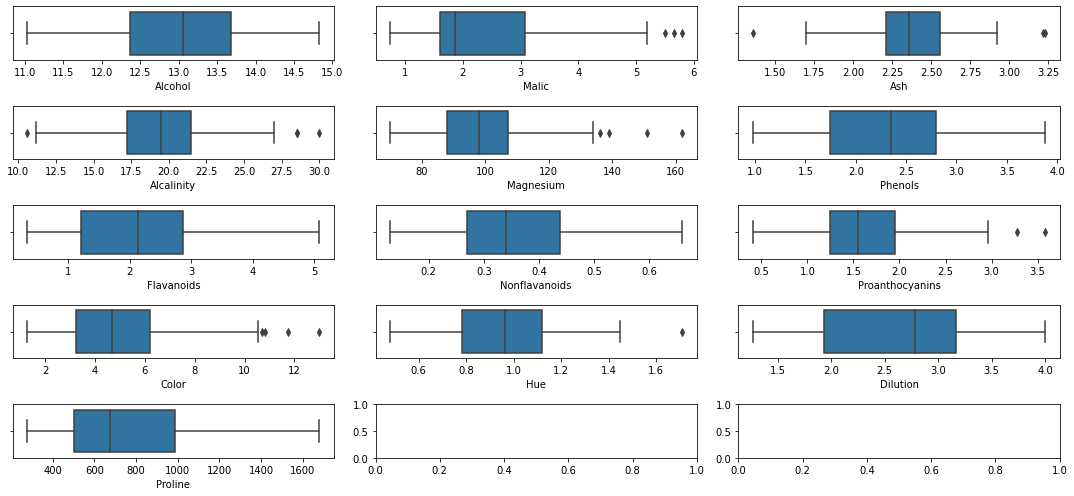

In [13]:
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.boxplot(wine1.Alcohol,ax=ax[0,0])
sns.boxplot(wine1.Malic,ax=ax[0,1])
sns.boxplot(wine1.Ash,ax=ax[0,2])
sns.boxplot(wine1.Alcalinity,ax=ax[1,0])
sns.boxplot(wine1.Magnesium,ax=ax[1,1])
sns.boxplot(wine1.Phenols,ax=ax[1,2])
sns.boxplot(wine1.Flavanoids,ax=ax[2,0])
sns.boxplot(wine1.Nonflavanoids,ax=ax[2,1])
sns.boxplot(wine1.Proanthocyanins,ax=ax[2,2])
sns.boxplot(wine1.Color,ax=ax[3,0])
sns.boxplot(wine1.Hue,ax=ax[3,1])
sns.boxplot(wine1.Dilution,ax=ax[3,2])
sns.boxplot(wine1.Proline, ax=ax[4,0])
plt.tight_layout()
plt.show()

## Using distplot we will check the dsitribution of the data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

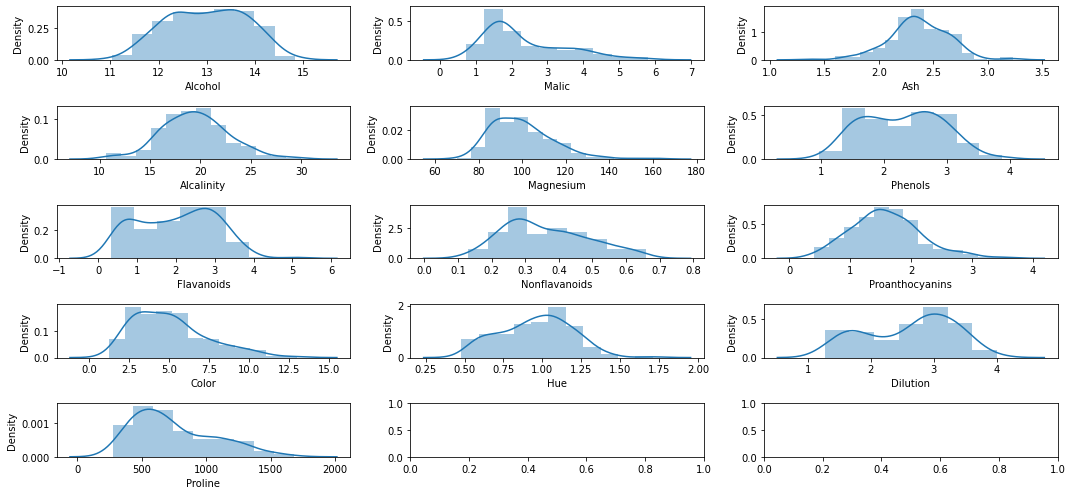

In [14]:
#We will visualise the distribution of data
fig, ax = plt.subplots(5, 3, figsize=(15,7))
sns.distplot(wine1.Alcohol,ax=ax[0,0])
sns.distplot(wine1.Malic,ax=ax[0,1])
sns.distplot(wine1.Ash,ax=ax[0,2])
sns.distplot(wine1.Alcalinity,ax=ax[1,0])
sns.distplot(wine1.Magnesium,ax=ax[1,1])
sns.distplot(wine1.Phenols,ax=ax[1,2])
sns.distplot(wine1.Flavanoids,ax=ax[2,0])
sns.distplot(wine1.Nonflavanoids,ax=ax[2,1])
sns.distplot(wine1.Proanthocyanins,ax=ax[2,2])
sns.distplot(wine1.Color,ax=ax[3,0])
sns.distplot(wine1.Hue,ax=ax[3,1])
sns.distplot(wine1.Dilution,ax=ax[3,2])
sns.distplot(wine1.Proline,ax=ax[4,0])
plt.tight_layout()
plt.show()

## Normalizing the numerical data for apply the clustering

In [15]:
wine1_normal = scale(wine1)

In [16]:
wine1_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## We will apply the different type of clustering method on the dataset without performing PCA and see the inference regarding clustering

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## First we will make the hierarchical cluster using of different type linkage  method

### Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

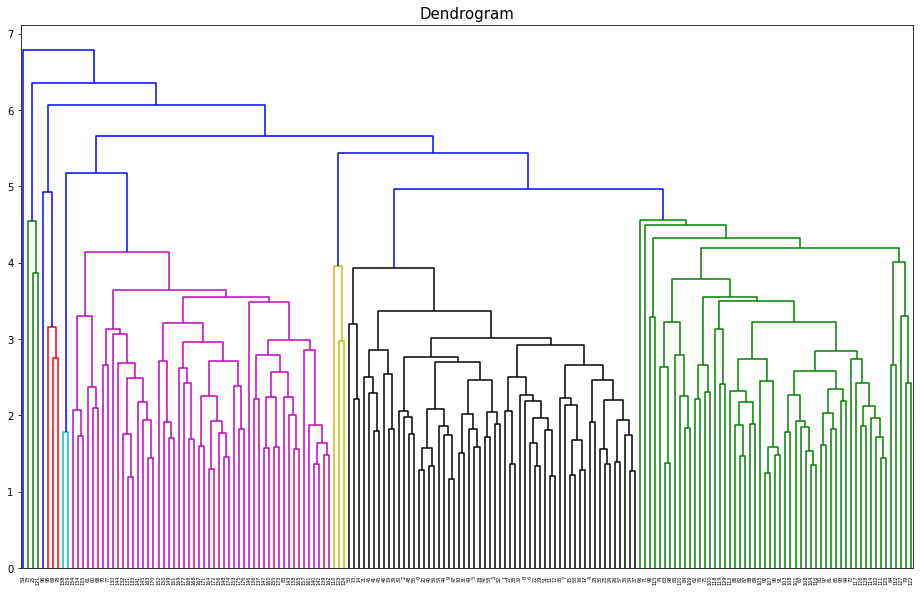

In [18]:
#create dendrogram
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='average'))
plt.title("Dendrogram",size=15)

In [19]:
# we will take 5 cluster
# create clusters
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [20]:
# save clusters for chart
y_hc1 = hc1.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [21]:
wine['cluster'] = y_hc1

In [22]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.500000,13.003879,1.996207,2.343017,18.665517,97.612069,2.568448,2.572069,0.322672,1.776379,4.27931,1.058879,3.017672,802.732759
1,1,2.888889,13.090185,3.181111,2.414815,21.087037,99.592593,1.697222,0.837778,0.455556,1.126852,6.99463,0.717148,1.710185,629.629630
2,2,1.666667,12.533333,1.923333,3.016667,27.833333,127.333333,3.036667,3.550000,0.383333,1.916667,4.31000,1.123333,3.463333,760.000000
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.95000,1.050000,1.820000,520.000000
4,4,2.000000,12.205000,1.455000,2.160000,18.025000,145.750000,1.962500,1.597500,0.237500,2.525000,2.83750,1.112500,2.567500,757.500000


In [23]:
#print the cluster details
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 116

cluster 1
Total Members: 54

cluster 2
Total Members: 3

cluster 3
Total Members: 1

cluster 4
Total Members: 4



### Applying complete linkage method

Text(0.5, 1.0, 'Dendrogram')

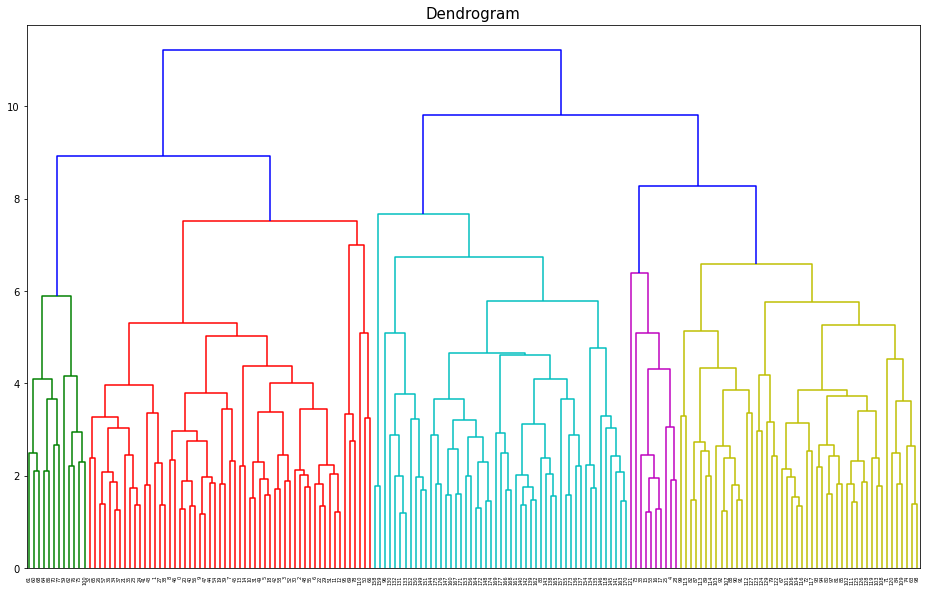

In [24]:
#create dendrogram
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='complete'))
plt.title("Dendrogram",size=15)

In [25]:
# we will take 4 cluster
# create clusters
hc2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [26]:
# save clusters for chart
y_hc2 = hc2.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [27]:
wine['cluster'] = y_hc2

In [28]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.862069,12.415172,1.989828,2.381379,21.117241,93.844828,2.424828,2.339828,0.366897,1.678103,3.280345,1.057931,2.978448,573.379310
1,1,1.105263,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632
2,2,2.941176,13.117843,3.322157,2.431765,21.333333,99.333333,1.675686,0.810588,0.444314,1.164314,7.170980,0.691373,1.709804,622.490196
3,3,2.000000,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000


In [29]:
#print cluster details
for i in range(4):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 57

cluster 2
Total Members: 51

cluster 3
Total Members: 12



### Applying centroid(ward) linkage method

Text(0.5, 1.0, 'Dendrogram')

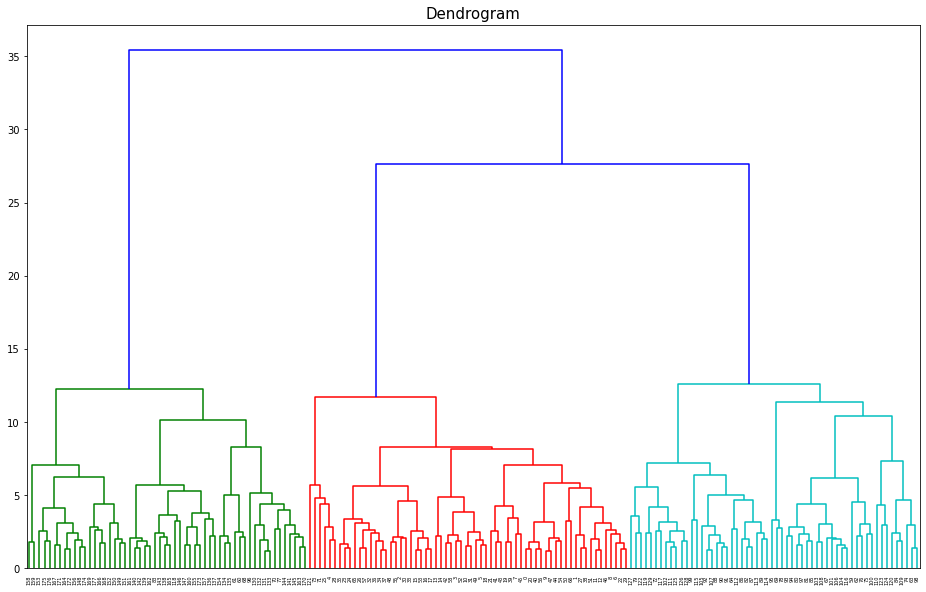

In [30]:
#create dendrogram
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='ward'))
plt.title("Dendrogram",size=15)

In [31]:
#we will take 3 cluster
#create clusters
hc3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [32]:
# save clusters for chart
y_hc3 = hc3.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [33]:
wine['cluster'] = y_hc3

In [34]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034
1,1,2.857143,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429
2,2,1.078125,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158438,1076.046875


In [35]:
# print the cluster details
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 58

cluster 1
Total Members: 56

cluster 2
Total Members: 64



### Applying single linkage method

Text(0.5, 1.0, 'Dendrogram')

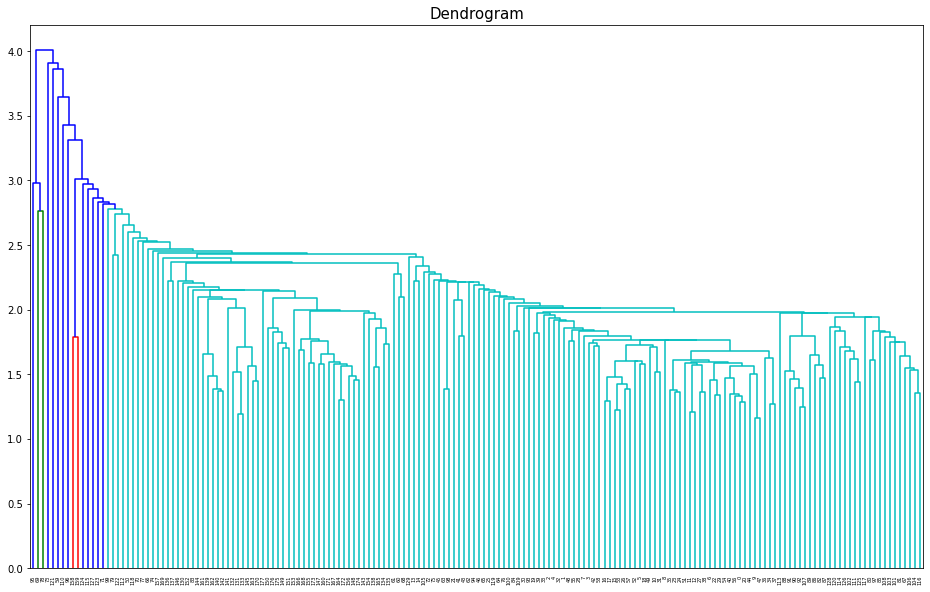

In [36]:
# create dendrogram
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine1_normal, method='single'))
plt.title("Dendrogram",size=15)

In [37]:
# from the above dendrogram we will take 2 clusters
#create clusters
hc4 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [38]:
# save clusters for chart
y_hc4 = hc4.fit_predict(wine1_normal)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])

In [39]:
wine['cluster'] = y_hc4

In [40]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.937143,13.012000,2.355257,2.373371,19.540000,98.885714,2.298743,2.0332,0.363429,1.569371,5.094229,0.953863,2.610686,745.954286
1,1,2.000000,12.336667,1.233333,1.966667,16.866667,149.666667,2.083333,1.8000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667


In [41]:
for i in range(2):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 175

cluster 1
Total Members: 3



### Now we will apply kmeans clustering on the dataset and see the results

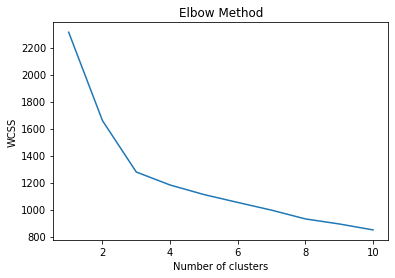

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine1_normal)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# from the above elbow method we will take 3 clusters
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine1_normal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [44]:
KM_label=clusters_new.labels_

In [45]:
wine['cluster'] = clusters_new.labels_

In [46]:
clusters_new.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [47]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [48]:
# print the clusters details
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 62

cluster 1
Total Members: 51

cluster 2
Total Members: 65



# Now will calculate the silhouette score for all clustering

In [49]:
from sklearn import metrics

In [50]:
SH_average=metrics.silhouette_score(wine1_normal,y_hc1)
SH_average

0.22945756295901437

In [51]:
SH_Ward=metrics.silhouette_score(wine1_normal,y_hc2)
SH_Ward

0.19382526203175696

In [52]:
SH_Complete=metrics.silhouette_score(wine1_normal,y_hc3)
SH_Complete

0.2774439826952265

In [53]:
SH_Single=metrics.silhouette_score(wine1_normal,y_hc4)
SH_Single

0.2224506072765093

In [54]:
SH_Kmeans=metrics.silhouette_score(wine1_normal,KM_label)
SH_Single

0.2224506072765093

# Now we perform the PCA on the normalized data

In [55]:
pca = PCA()
pca_values = pca.fit_transform(wine1_normal)

In [56]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [57]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine1_normal)

In [58]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [59]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [60]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

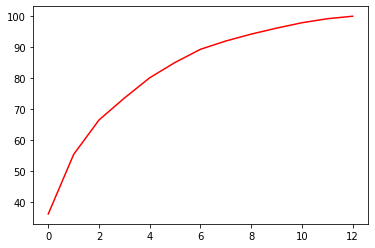

In [61]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [64]:
# we will take 3 PCs
wine_pca=pca_values[:,0:3]

## Now we will make the cluster by using first 3 PCs



```
# This is formatted as code
```

### Applying centroid(ward) linkage method 

Text(0.5, 1.0, 'Dendrogram')

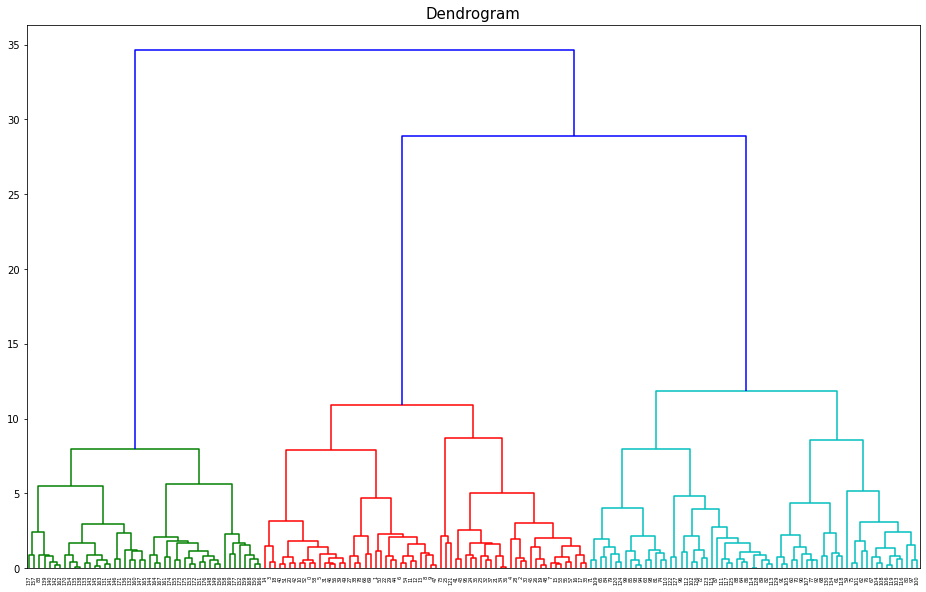

In [65]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='ward'))
plt.title("Dendrogram",size=15)

In [66]:
hc1p = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [67]:
y_hc1p = hc1p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc1p,columns=['Clusters'])

In [68]:
wine['cluster'] = y_hc1p

In [69]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.030303,12.264242,1.932121,2.245455,20.087879,91.666667,2.220152,1.991364,0.367727,1.540455,3.036364,1.042515,2.729848,504.439394
1,1,2.978723,13.171489,3.431702,2.441064,21.595745,98.829787,1.674894,0.792979,0.452766,1.165957,7.452553,0.682979,1.702553,627.021277
2,2,1.092308,13.624769,1.954769,2.435538,17.373846,108.600000,2.819692,2.961692,0.290154,1.949385,5.379538,1.069538,3.149077,1079.753846


In [70]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 66

cluster 1
Total Members: 47

cluster 2
Total Members: 65



### Applying average linkage method

Text(0.5, 1.0, 'Dendrogram')

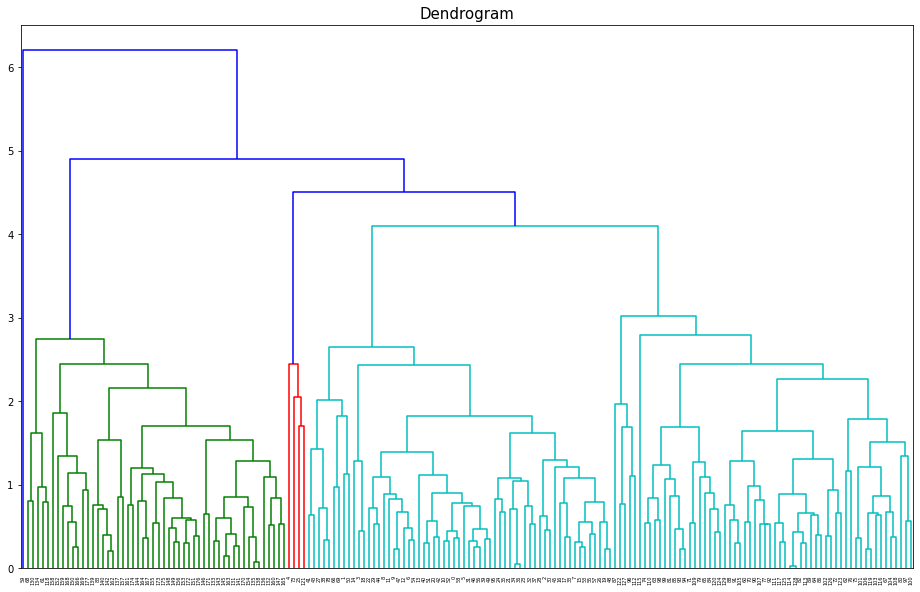

In [71]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='average'))
plt.title("Dendrogram",size=15)

In [72]:
hc2p = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

In [73]:
y_hc2p = hc2p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc2p,columns=['Clusters'])

In [74]:
wine['cluster'] = y_hc2p

In [75]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.000000,12.215833,1.971000,2.265167,20.498333,91.083333,2.247667,2.084500,0.361167,1.619833,2.943000,1.059100,2.831833,498.683333
1,1,1.065574,13.684754,1.945902,2.399836,16.800000,107.524590,2.809344,2.937213,0.283934,1.953115,5.449508,1.067377,3.137213,1101.131148
2,2,2.923077,13.138077,3.261731,2.416538,21.159615,98.884615,1.700192,0.828077,0.453846,1.131923,7.156538,0.698269,1.701154,621.576923
3,3,2.000000,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000
4,4,1.500000,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000


In [76]:
for i in range(5):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 60

cluster 1
Total Members: 61

cluster 2
Total Members: 52

cluster 3
Total Members: 1

cluster 4
Total Members: 4



### Applying complete linkage method

Text(0.5, 1.0, 'Dendrogram')

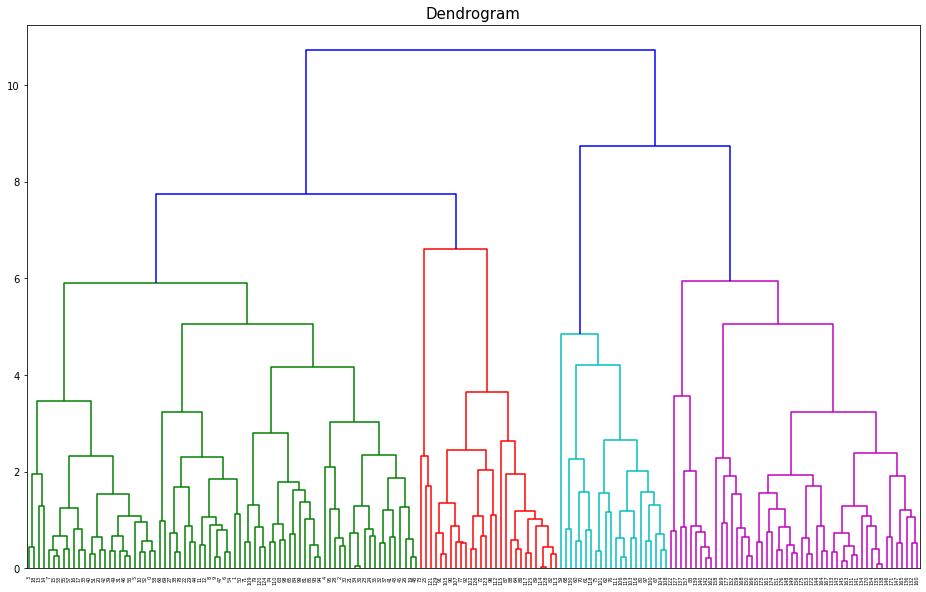

In [77]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='complete'))
plt.title("Dendrogram",size=15)

In [78]:
hc3p = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [79]:
y_hc3p = hc3p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc3p,columns=['Clusters'])

In [80]:
wine['cluster'] = y_hc3p

In [81]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.964286,12.193929,2.023571,2.449286,22.453571,94.321429,2.129643,2.066786,0.422857,1.504643,2.934643,1.050000,2.814643,503.571429
1,1,2.940000,13.115600,3.381800,2.449800,21.750000,98.480000,1.701000,0.844400,0.457800,1.190400,7.216000,0.694800,1.741800,619.020000
2,2,2.045455,12.429091,1.612727,1.984545,17.918182,91.772727,2.021818,1.668636,0.349545,1.211818,3.138636,1.044364,2.534091,522.863636
3,3,1.256410,13.377692,1.982564,2.391154,17.432051,104.743590,2.812436,2.877051,0.281923,1.985513,4.978462,1.068077,3.118333,979.397436


In [82]:
for i in range(4):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 28

cluster 1
Total Members: 50

cluster 2
Total Members: 22

cluster 3
Total Members: 78



### Applying single linkage method

Text(0.5, 1.0, 'Dendrogram')

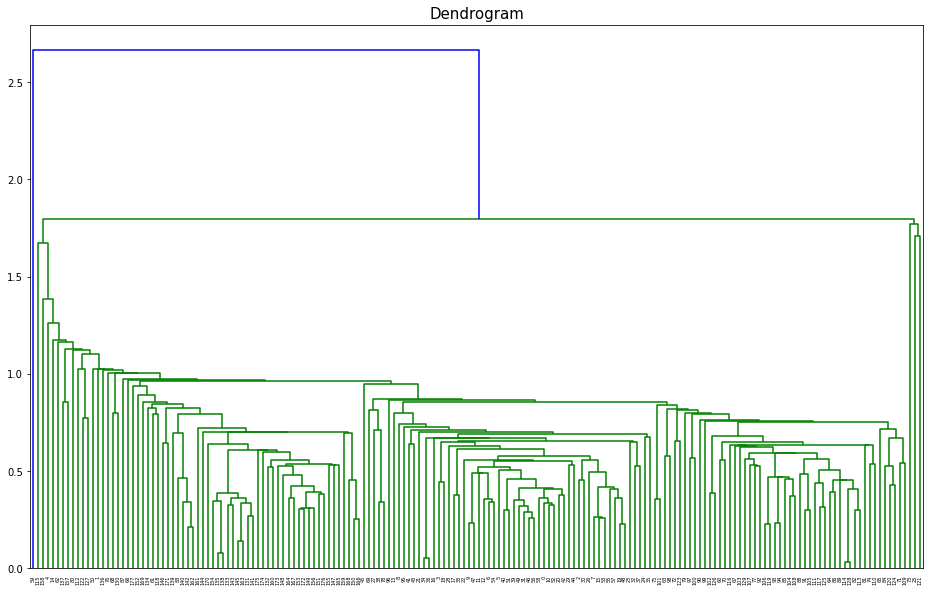

In [83]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(wine_pca, method='single'))
plt.title("Dendrogram",size=15)

In [84]:
hc4p = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')

In [85]:
y_hc4p = hc4p.fit_predict(wine_pca)
Clusters=pd.DataFrame(y_hc4p,columns=['Clusters'])

In [86]:
wine['cluster'] = y_hc4p

In [87]:
for i in range(2):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 177

cluster 1
Total Members: 1



### Applying K means clustering

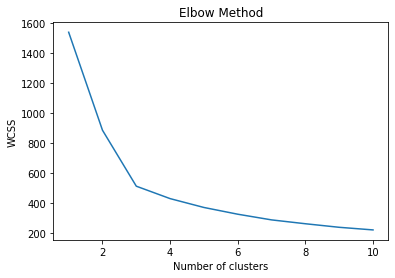

In [88]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(wine_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [89]:
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(wine_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [90]:
KM_pca_label=clusters_new.labels_

In [91]:
wine['cluster'] = clusters_new.labels_

In [92]:
clusters_new.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01]])

In [93]:
wine.groupby('cluster').agg(['mean']).reset_index()

,cluster,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,1,1.063492,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095
2,2,2.000000,12.249062,1.910312,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125


In [94]:
for i in range(3):
    print("cluster", i)
   # print("The Members:",(list(airlines[airlines['cluster'] == i]['ID#'].values)))
    print("Total Members:", len(list(wine[wine['cluster'] == i]['Type'].values)))
    print()

cluster 0
Total Members: 51

cluster 1
Total Members: 63

cluster 2
Total Members: 64



# Now we will calculate the  silhouette score on pca clusters

In [95]:
from sklearn import metrics

In [96]:
SH_ward_PCA=metrics.silhouette_score(wine_pca,y_hc1p)
SH_ward_PCA

0.4459492198062967

In [97]:
SH_average_PCA=metrics.silhouette_score(wine_pca,y_hc2p)
SH_average_PCA

0.4465449278023582

In [98]:
SH_complete_PCA=metrics.silhouette_score(wine_pca,y_hc3p)
SH_complete_PCA

0.35784842685673063

In [99]:
SH_single_PCA=metrics.silhouette_score(wine_pca,y_hc4p)
SH_single_PCA

0.36310673051041453

In [100]:
SH_kmeans_PCA=metrics.silhouette_score(wine_pca,KM_pca_label)
SH_kmeans_PCA

0.45323512156839485

In [101]:
##Silhouette_score for before using pca data
SH_average,SH_Ward,SH_Complete,SH_Single,SH_Kmeans

(0.22945756295901437,
 0.19382526203175696,
 0.2774439826952265,
 0.2224506072765093,
 0.2848589191898987)

In [102]:
##Silhouette_score for after using pca data
SH_ward_PCA,SH_average_PCA,SH_complete_PCA,SH_single_PCA,SH_kmeans_PCA

(0.4459492198062967,
 0.4465449278023582,
 0.35784842685673063,
 0.36310673051041453,
 0.45323512156839485)

Conclusion:- I have analyzed that before performing PCA the cluster result is similar to after performing PCA but we gain double silhohuette score after applying PCA that means the complexity or overlaping of data is decreased after performing PCA.
And from clustring point of view for the both the case (before PCA and after PCA) 3 clusters are good which we got from centroid linkage and kmeans clsutering.